# Unity Index

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *
import pdb
n = 25

In [63]:
def colores(n):
    from random import randint
    colors = []
    for i in range(n):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    return(colors)

In [64]:
df = pd.read_csv('TopUnity_Data.csv', encoding = 'latin-1', sep=';')

In [65]:
def TopUnity(df,cr_file):
    '''
    This function calculates the TopUnity indez design/created by Plata C. 
    The script is written by Casallas A and works like this:
    Input the excel or csv file. The file have to contain as columns the Authors names, number of articles,
    number of citations and h_index.
    The script calculates the TopUnity index and the RaiseInRank, which is return as a new DataFrame and as a 
    csv file. For information related to the index contact: carlos.plata@tsm-education.fr, and for information of the 
    code contact: acasalla@ictp.it
    '''
    top = np.ones([len(df.columns), len(df)])
    for i,col in enumerate(df.columns[1:]):
        top[i,:] = df[col].rank(method='min', ascending = False)
    unity = top[0,:] + top[1,:] + top[2,:]
    TopU = pd.DataFrame(np.column_stack((df['Authors'],unity)), columns = ['Authors','Unity'])
    uni_sort = TopU['Unity'].rank(method='min', ascending = True)
    TopUni = pd.DataFrame(np.column_stack((df['Authors'],df['Articles'],df['LocalCitations'],df['h_index'],
                                           top[0,:], top[1,:],top[2,:],unity,uni_sort,top[0,:]-uni_sort)), 
                          columns = ['Authors','Articles','LocalCitations','h_index',
                                     'PointsPublications','PointsCitations','PointsH-Index','UnityIndex','UnityRank','RaiseInRank'])
    TopUni = TopUni.sort_values(by=['UnityRank'],ascending=True)
    if cr_file == True:
        TopUni.to_csv('TopUnity_file.csv', index=False)
    return(TopUni)

def plot_TopUnity(TopUni,n):
    '''
    This function calculates the TopUnity indez design/created by Plata C. 
    The script is written by Casallas A and works like this:
    You input the TopUni DataFrame and the number of author to plot.
    The output is a scatter plot, where the legend is sort by TopUnity and the 
    size of the markers is the H-Index.
    For information related to the index contact: carlos.plata@tsm-education.fr, 
    and for information of the code contact: acasalla@ictp.it
    '''
    colors = colores(n)
    xx = TopUni['Articles'][0:n]
    yy = TopUni['LocalCitations'][0:n]
    s = TopUni['h_index'][0:n]
    r = np.array(s)**3 + 400
    names = list(TopUni['Authors'][0:n])
    plt.figure(figsize=(12,8))
    for i,val in enumerate(r):
        plt.scatter(np.array(xx)[i],np.array(yy)[i],s=r[i], color = colors[i], 
                    label = names[i], alpha = 0.5, edgecolor = 'k')
    plt.grid(linestyle=':')
    plt.xlabel('Number of Articles', fontsize = 12)
    plt.ylabel('Number of Citations', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.legend(ncol=1, bbox_to_anchor=(1.12,1.05), loc = 'upper center', frameon = False, fontsize = 12)
    #plt.text(40,50,'Quadrant I', fontweight = 'bold')
    #plt.text(0,50,'Quadrant II', fontweight = 'bold')
    #plt.text(0,10,'Quadrant III', fontweight = 'bold', fontsize = 8)
    #plt.text(40,10,'Quadrant IV', fontweight = 'bold')

In [66]:
TopUni = TopUnity(df, True)

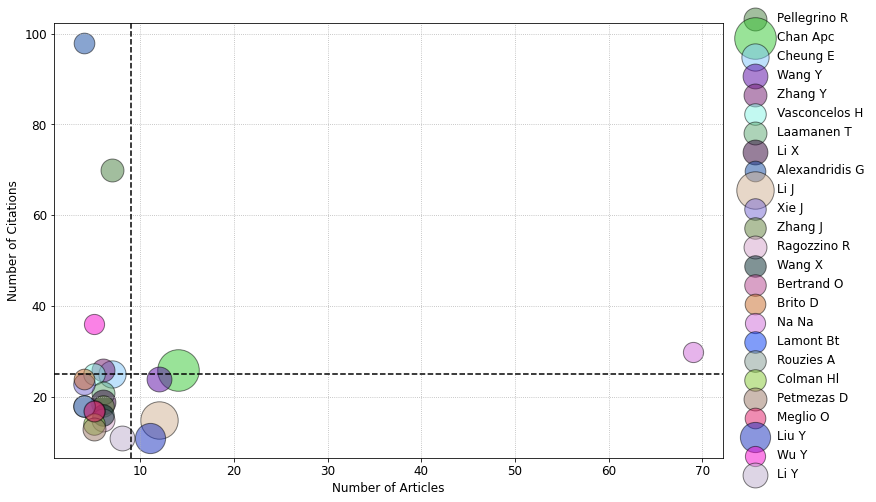

In [67]:
n = 25
plot_TopUnity(TopUni,n)
plt.axhline(TopUni['LocalCitations'][0:n].mean(), color = 'k', linestyle = '--')
plt.axvline(TopUni['Articles'][0:n].mean(), color = 'k', linestyle = '--')


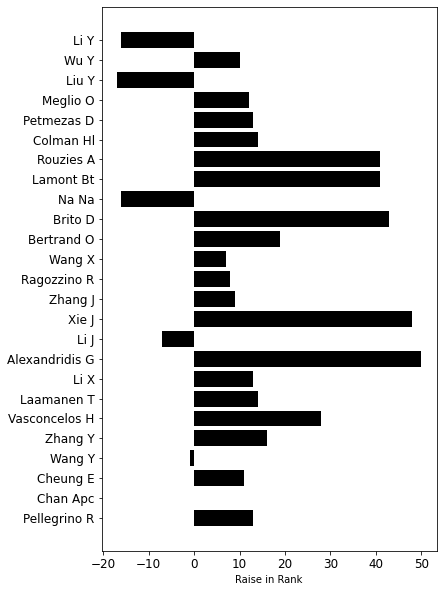

In [78]:
#Raise in Rank Figure
dfur= TopUni.sort_values(by='UnityRank', ascending= True)
fig = plt.figure(figsize=(6,10))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.38, wspace=0.26, top=0.9, bottom=0.1)
plt.barh(list(dfur['Authors'][0:n]), dfur['RaiseInRank'][0:n], color='k') 
plt.xlabel('Raise in Rank')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

In [70]:
TopUni1

,Authors,Articles,LocalCitations,h_index,PointsPublications,PointsCitations,PointsH-Index,UnityIndex,UnityRank,RaiseInRank
17,Pellegrino R,7,70,5,14,5,18,37,1,13
1,Chan Apc,14,26,11,2,50,1,53,2,0
13,Cheung E,7,25,7,14,52,4,70,3,11
4,Wang Y,12,24,6,3,59,11,73,4,-1
31,Zhang Y,6,26,5,21,50,18,89,5,16
53,Vasconcelos H,5,25,4,34,52,28,114,6,28
21,Laamanen T,6,21,5,21,79,18,118,7,14
22,Li X,6,19,6,21,87,11,119,8,13
59,Alexandridis G,4,98,3,59,4,62,125,9,50
2,Li J,12,15,10,3,124,2,129,10,-7
